# 7장 시계열 데이터를 다뤄보자

### 작성 : [PinkWink](http://pinkwink.kr) 

## 7-1. Numpy의 polyfit으로 회귀(regression) 분석하기
* pip install pandas_datareader
* conda install -c conda-forge fbprophet

In [2]:
!pip install pandas_datareader

In [7]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [8]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [9]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


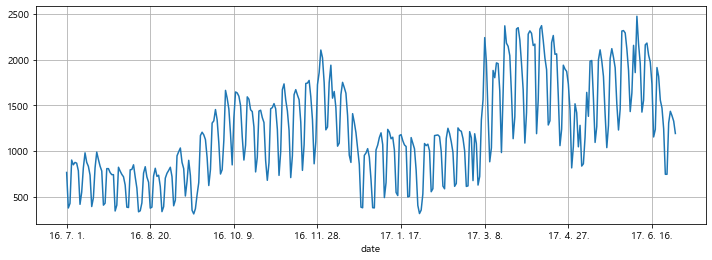

In [10]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [12]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [13]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [16]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109637
430.62841018946955
429.53280466762925
330.477730634393


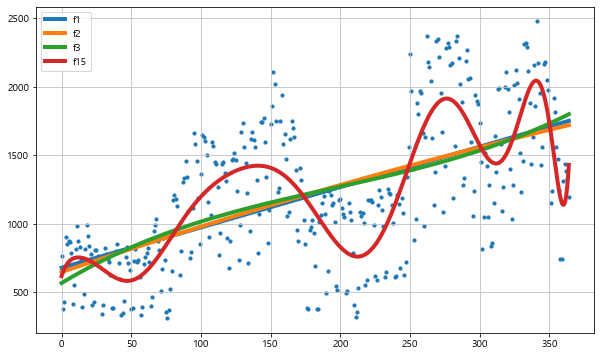

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

## 7-2. Prophet 모듈을 이용한 forecast 예측

In [18]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [20]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,905.968297,696.206466,1115.902965
421,2017-08-26,490.958897,282.717754,696.499130
422,2017-08-27,623.581075,408.592861,837.389436
423,2017-08-28,1176.248028,976.666289,1407.545256
424,2017-08-29,1212.236815,1008.304044,1411.261113


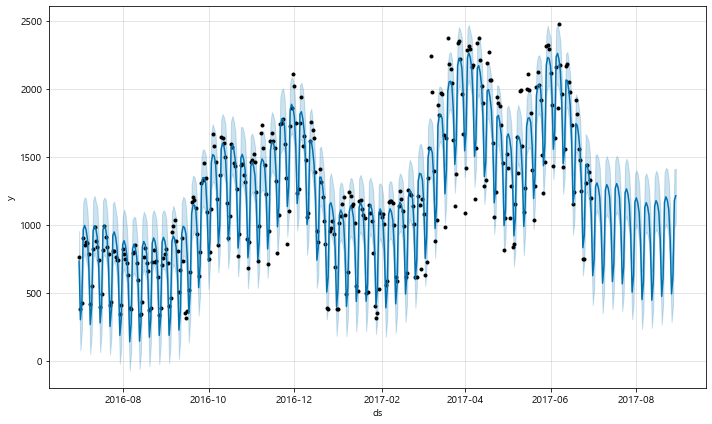

In [24]:
m.plot(forecast);

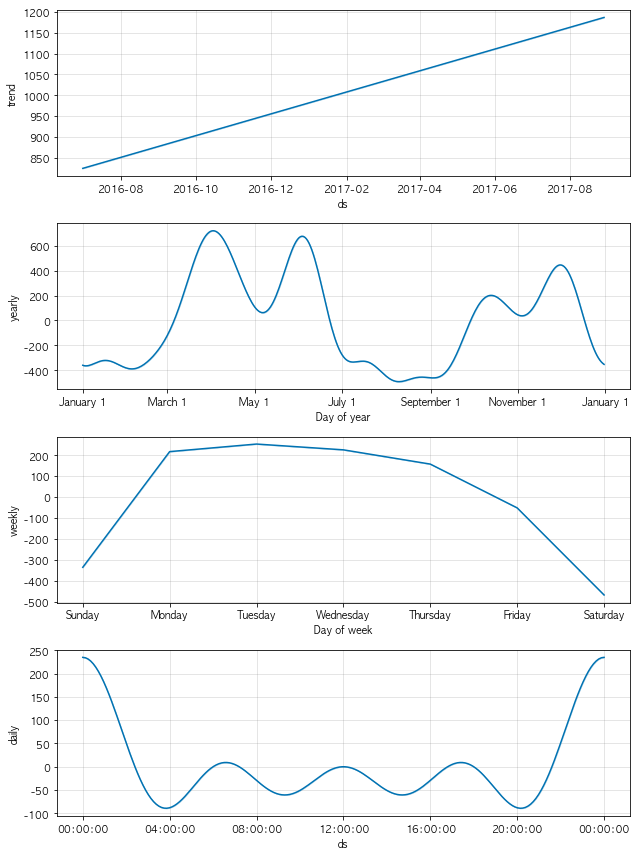

In [14]:
m.plot_components(forecast);

## 7-3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [27]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22415 sha256=077005a654fd2c40eb3677a0719c7e177af6cc13cc19980bcb862b6e1bf0b13c
  Stored in directory: c:\users\edu\appdata\local\pip\cache\wheels\28\79\3c\08a301b673366fe664fe2853e136eb2acc1bb752045c11c6a1
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8374 sha256=28c7486e14706c07cb7fa698e161ee69cabe2779b25f02e31dbd4633b8daa058
  Stored in directory: c:\users\edu\appdata\local\pip\cache\wheels\ae\25\47\4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


In [28]:
!pip install fix_yahoo_finance

  Using cached fix-yahoo-finance-0.1.37.tar.gz (6.3 kB)
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7062 sha256=bb9880ea94aa2f9fb870e910f4d927ea152fa1ac5c3a8692a21d44c2239d9f73
  Stored in directory: c:\users\edu\appdata\local\pip\cache\wheels\1a\41\80\6cd5c10b88a3546cbe4cb412633ef2d12906510c403f723676
Successfully built fix-yahoo-finance


In [30]:
from pandas_datareader import data
# import fix_yahoo_finance as yf
import yfinance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2017-6-30' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,7665.240234,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,7248.089844,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,6935.220215,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,6778.790039,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,7091.649902,1076700


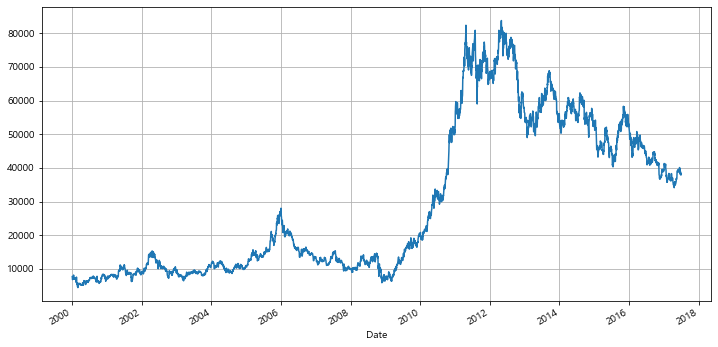

In [31]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [32]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,7665.240234,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,7248.089844,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,6935.220215,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,6778.790039,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,7091.649902,1076700
...,...,...,...,...,...,...
2016-12-23,38700.000000,39350.000000,38650.000000,39100.000000,39100.000000,1070783
2016-12-26,39100.000000,39350.000000,38850.000000,39000.000000,39000.000000,465612
2016-12-27,39050.000000,39700.000000,39050.000000,39500.000000,39500.000000,879686


In [33]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.240234
1,2000-01-05,7248.089844
2,2000-01-06,6935.220215
3,2000-01-07,6778.790039
4,2000-01-10,7091.649902


In [34]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [35]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4577,2017-12-25
4578,2017-12-26
4579,2017-12-27
4580,2017-12-28
4581,2017-12-29


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4577,2017-12-25,35721.758796,26502.872431,45667.514408
4578,2017-12-26,35766.767400,26819.177731,45313.547343
4579,2017-12-27,35736.344575,26530.777050,45067.500546
4580,2017-12-28,35701.131429,27286.983631,45889.952226
4581,2017-12-29,35638.910686,26650.202933,45569.217970


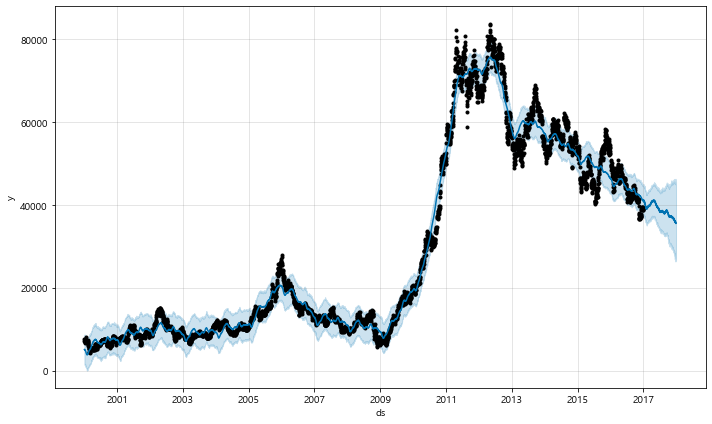

In [37]:
m.plot(forecast);

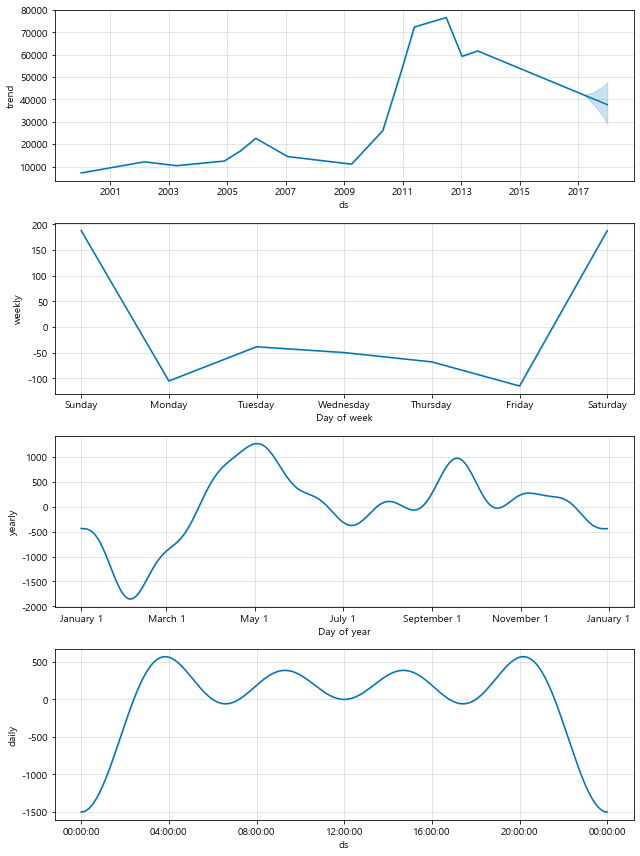

In [38]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 downloaded


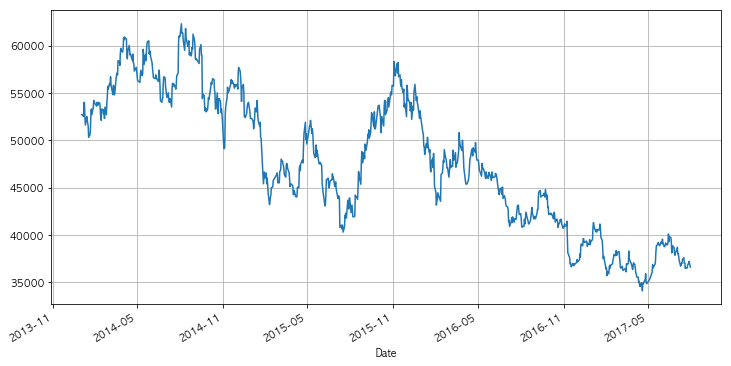

In [27]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

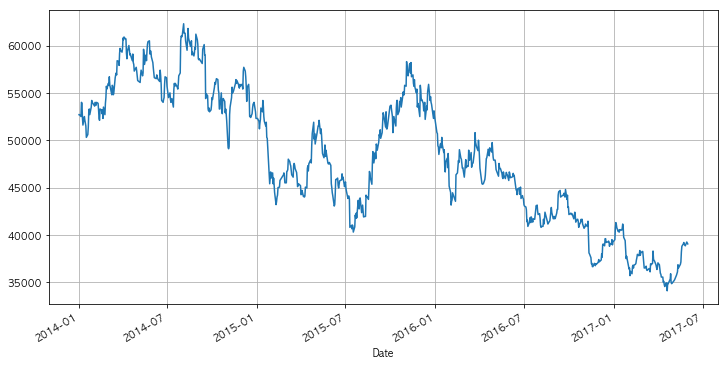

In [28]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [29]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [30]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [31]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


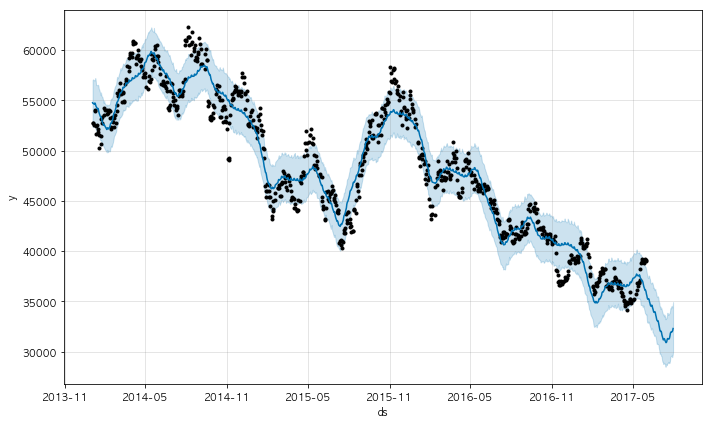

In [32]:
forecast = m.predict(future)
m.plot(forecast);

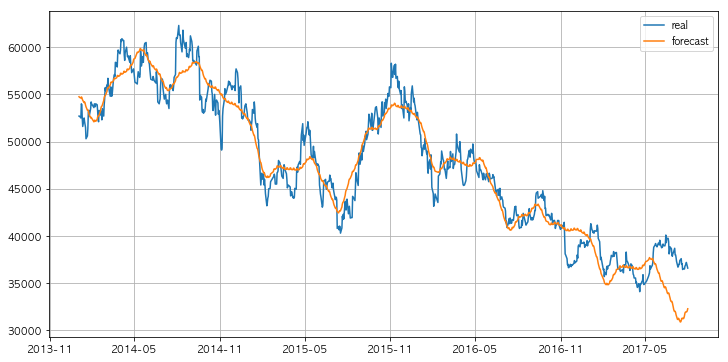

In [33]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## 7-4 Growth Model과 Holiday Forecast

In [34]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [35]:
df['cap'] = 8.5

In [36]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

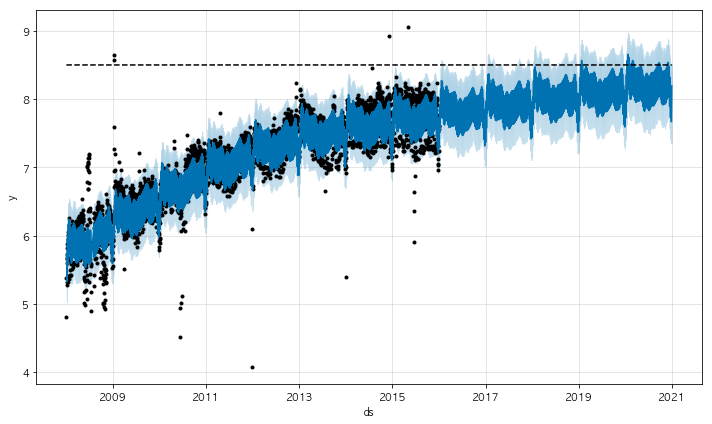

In [37]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

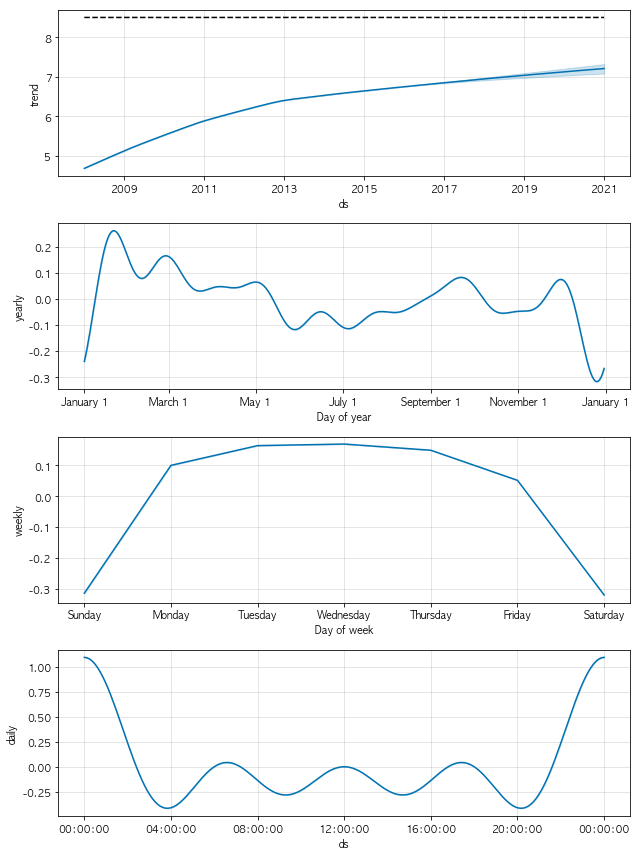

In [38]:
forecast = m.predict(future)
m.plot_components(forecast);

## holiday

In [39]:
df = pd.read_csv('../data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

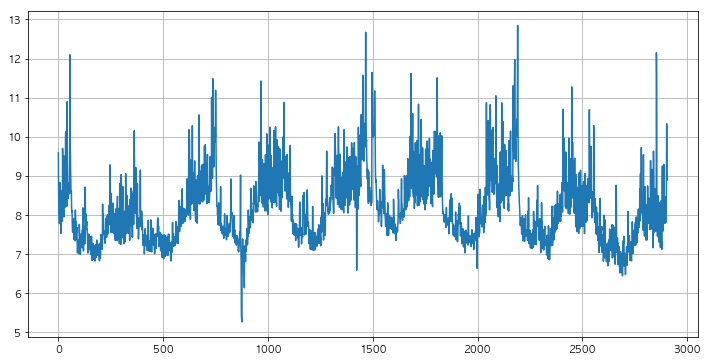

In [40]:
df.y.plot(figsize=(12,6), grid=True);

In [41]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [42]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [43]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.225683,1.174862
2191,2014-02-03,1.901161,1.456941
2532,2015-01-11,1.225683,0.000000
2533,2015-01-12,1.901161,0.000000
2901,2016-01-17,1.225683,0.000000
2902,2016-01-18,1.901161,0.000000
2908,2016-01-24,1.225683,0.000000
2909,2016-01-25,1.901161,0.000000
2922,2016-02-07,1.225683,1.174862
2923,2016-02-08,1.901161,1.456941


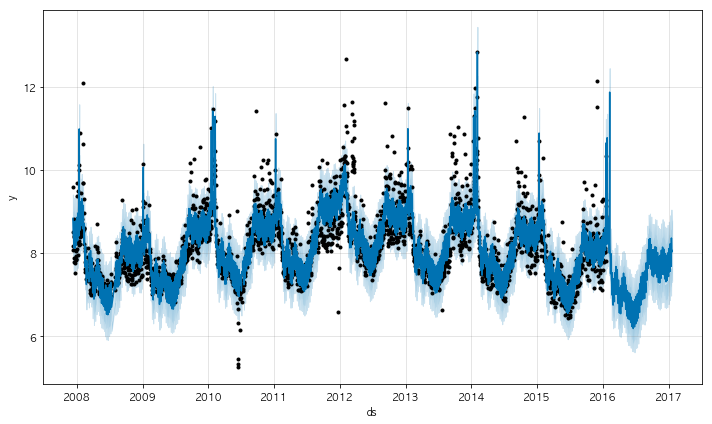

In [44]:
m.plot(forecast);

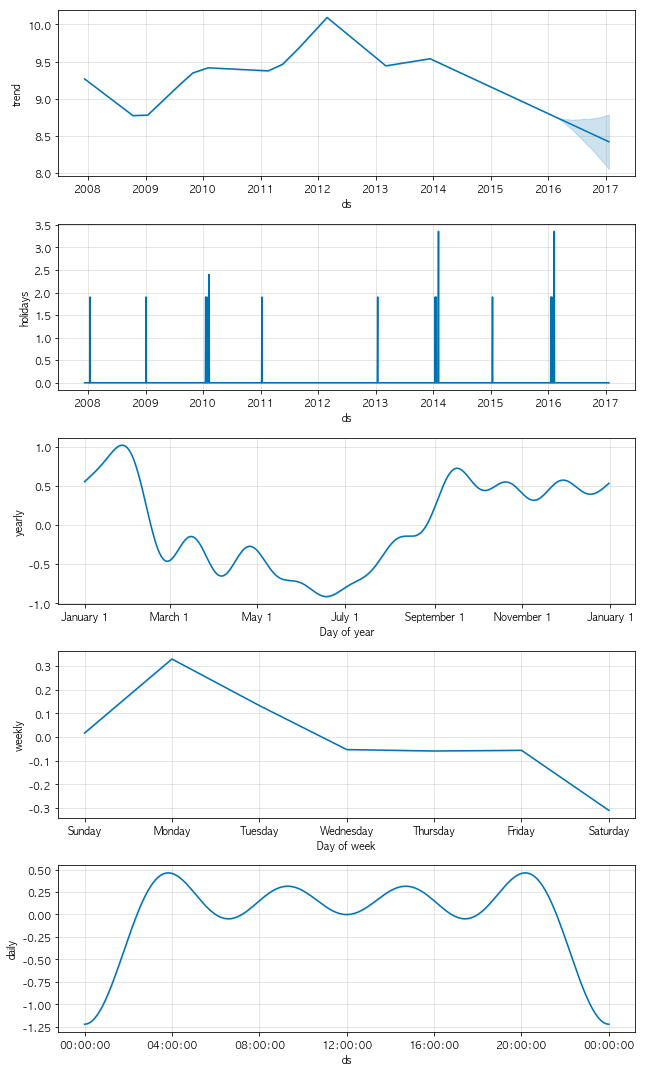

In [45]:
m.plot_components(forecast);